In [ ]:
#data manipulation and visualisation libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#variable scaling libraries
from sklearn.preprocessing import StandardScaler

#variables normalisation
from scipy.stats import boxcox

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('/content/riceClassification.csv')

In [ ]:
data = data.drop(columns = 'id', axis = 1)

In [ ]:
#normalization of all attributes with outliers
columns = data.columns
columns = [c for c in columns if c not in ['Extent', 'Class']]

for col in columns:
    data[col] = boxcox(x=data[col])[0]

In [ ]:
columns = data.columns
columns = [c for c in columns if c not in ['Class']]
y = data['Class'] 
X = data[columns]

In [ ]:
#preparation of train and test data for Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1) #70 % of train data, 30 % of test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12729, 10), (5456, 10), (12729,), (5456,))

[[1956  504]
 [1306 1690]]


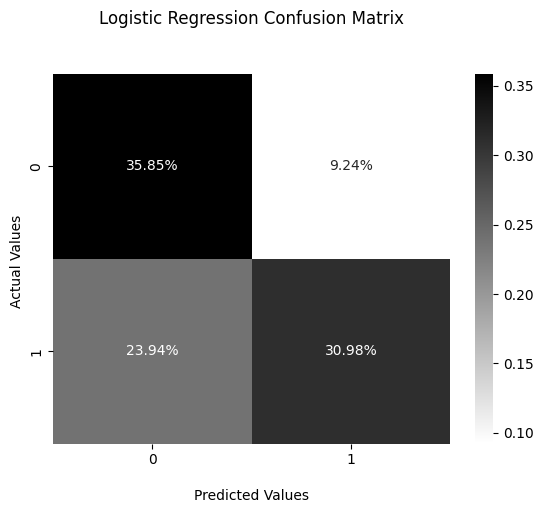

In [ ]:
#implementing Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#plotting Confusion Matrix
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(cf_matrix_lr)

ax = sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Logistic Regression Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#evaluation of Logistic Regression: metrics pivot chart
print(classification_report(y_test, y_pred_lr))

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_lr),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_lr),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_lr),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_lr),3)))

              precision    recall  f1-score   support

           0       0.60      0.80      0.68      2460
           1       0.77      0.56      0.65      2996

    accuracy                           0.67      5456
   macro avg       0.68      0.68      0.67      5456
weighted avg       0.69      0.67      0.67      5456

Accuracy Score : 0.668
Precision Score : 0.77
Recall Score : 0.564
F-Score : 0.651
